In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('FeedGrains.csv')

In [3]:
data.head()


,SC_Group_ID,SC_Group_Desc,SC_GroupCommod_ID,SC_GroupCommod_Desc,SC_Geography_ID,SortOrder,SC_GeographyIndented_Desc,SC_Commodity_ID,SC_Commodity_Desc,SC_Attribute_ID,SC_Attribute_Desc,SC_Unit_ID,SC_Unit_Desc,Year_ID,SC_Frequency_ID,SC_Frequency_Desc,Timeperiod_ID,Timeperiod_Desc,Amount
0,2,Supply and use,9.0,Barley,1,0.8,United States,1,Barley,1,Planted acreage,2,Million acres,1926,3,Annual,69,Commodity Market Year,8.796
1,2,Supply and use,9.0,Barley,1,0.8,United States,1,Barley,1,Planted acreage,2,Million acres,1927,3,Annual,69,Commodity Market Year,9.513
2,2,Supply and use,9.0,Barley,1,0.8,United States,1,Barley,1,Planted acreage,2,Million acres,1928,3,Annual,69,Commodity Market Year,12.828
3,2,Supply and use,9.0,Barley,1,0.8,United States,1,Barley,1,Planted acreage,2,Million acres,1929,3,Annual,69,Commodity Market Year,14.703
4,2,Supply and use,9.0,Barley,1,0.8,United States,1,Barley,1,Planted acreage,2,Million acres,1930,3,Annual,69,Commodity Market Year,13.581


In [4]:
# Check for missing values
data.isnull().sum()



SC_Group_ID                     0
SC_Group_Desc                   0
SC_GroupCommod_ID            7377
SC_GroupCommod_Desc          7377
SC_Geography_ID                 0
SortOrder                       0
SC_GeographyIndented_Desc       0
SC_Commodity_ID                 0
SC_Commodity_Desc               0
SC_Attribute_ID                 0
SC_Attribute_Desc               0
SC_Unit_ID                      0
SC_Unit_Desc                    0
Year_ID                         0
SC_Frequency_ID                 0
SC_Frequency_Desc               0
Timeperiod_ID                   0
Timeperiod_Desc                 0
Amount                          0
dtype: int64

In [5]:
# Check for duplicate rows
data.duplicated().sum()

0

In [6]:
# Check data types of each column
data.dtypes

SC_Group_ID                    int64
SC_Group_Desc                 object
SC_GroupCommod_ID            float64
SC_GroupCommod_Desc           object
SC_Geography_ID                int64
SortOrder                    float64
SC_GeographyIndented_Desc     object
SC_Commodity_ID                int64
SC_Commodity_Desc             object
SC_Attribute_ID                int64
SC_Attribute_Desc             object
SC_Unit_ID                     int64
SC_Unit_Desc                  object
Year_ID                        int64
SC_Frequency_ID                int64
SC_Frequency_Desc             object
Timeperiod_ID                  int64
Timeperiod_Desc               object
Amount                       float64
dtype: object

## Exploratory Data Analysis

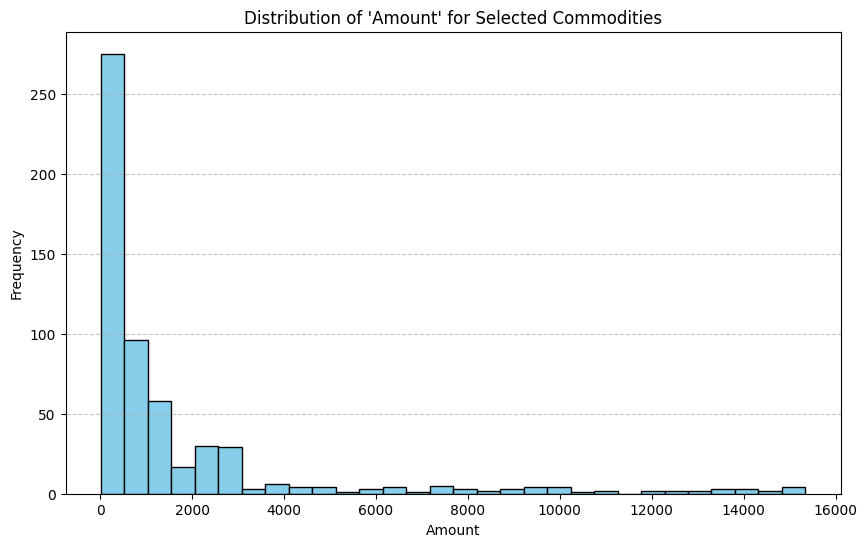

In [7]:
filtered_data = data[
    ((data['SC_Commodity_Desc'] == 'Corn') | 
     (data['SC_Commodity_Desc'] == 'Barley') | 
     (data['SC_Commodity_Desc'] == 'Sorghum') | 
     (data['SC_Commodity_Desc'] == 'Oats')) &
    (data['SC_Attribute_Desc'] == 'Production') &
    (data['Timeperiod_Desc'] == 'Commodity Market Year')
]

plt.figure(figsize=(10, 6))
plt.hist(filtered_data["Amount"], bins=30, color="skyblue", edgecolor="black")
plt.title("Distribution of 'Amount' for Selected Commodities")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

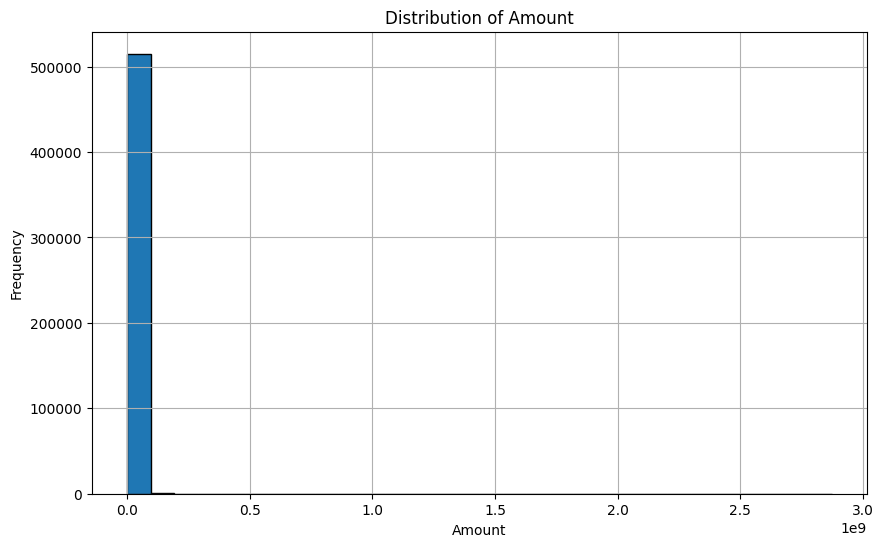

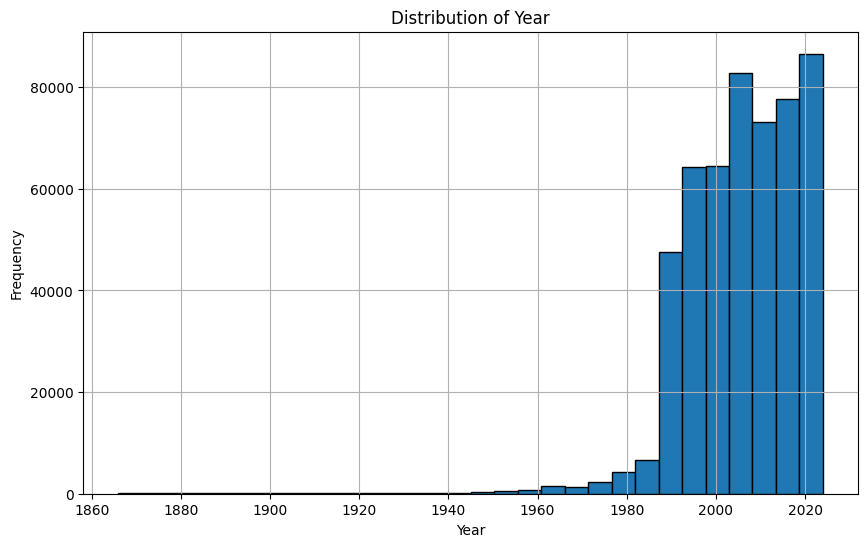

In [8]:

# Univariate analysis of the 'Amount' column
plt.figure(figsize=(10, 6))
plt.hist(data['Amount'], bins=30, edgecolor='black')
plt.title('Distribution of Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Univariate analysis of the 'Year_ID' column
plt.figure(figsize=(10, 6))
plt.hist(data['Year_ID'], bins=30, edgecolor='black')
plt.title('Distribution of Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


## Reaserch Questions

1. How have the production amounts of different commodities changed over time?

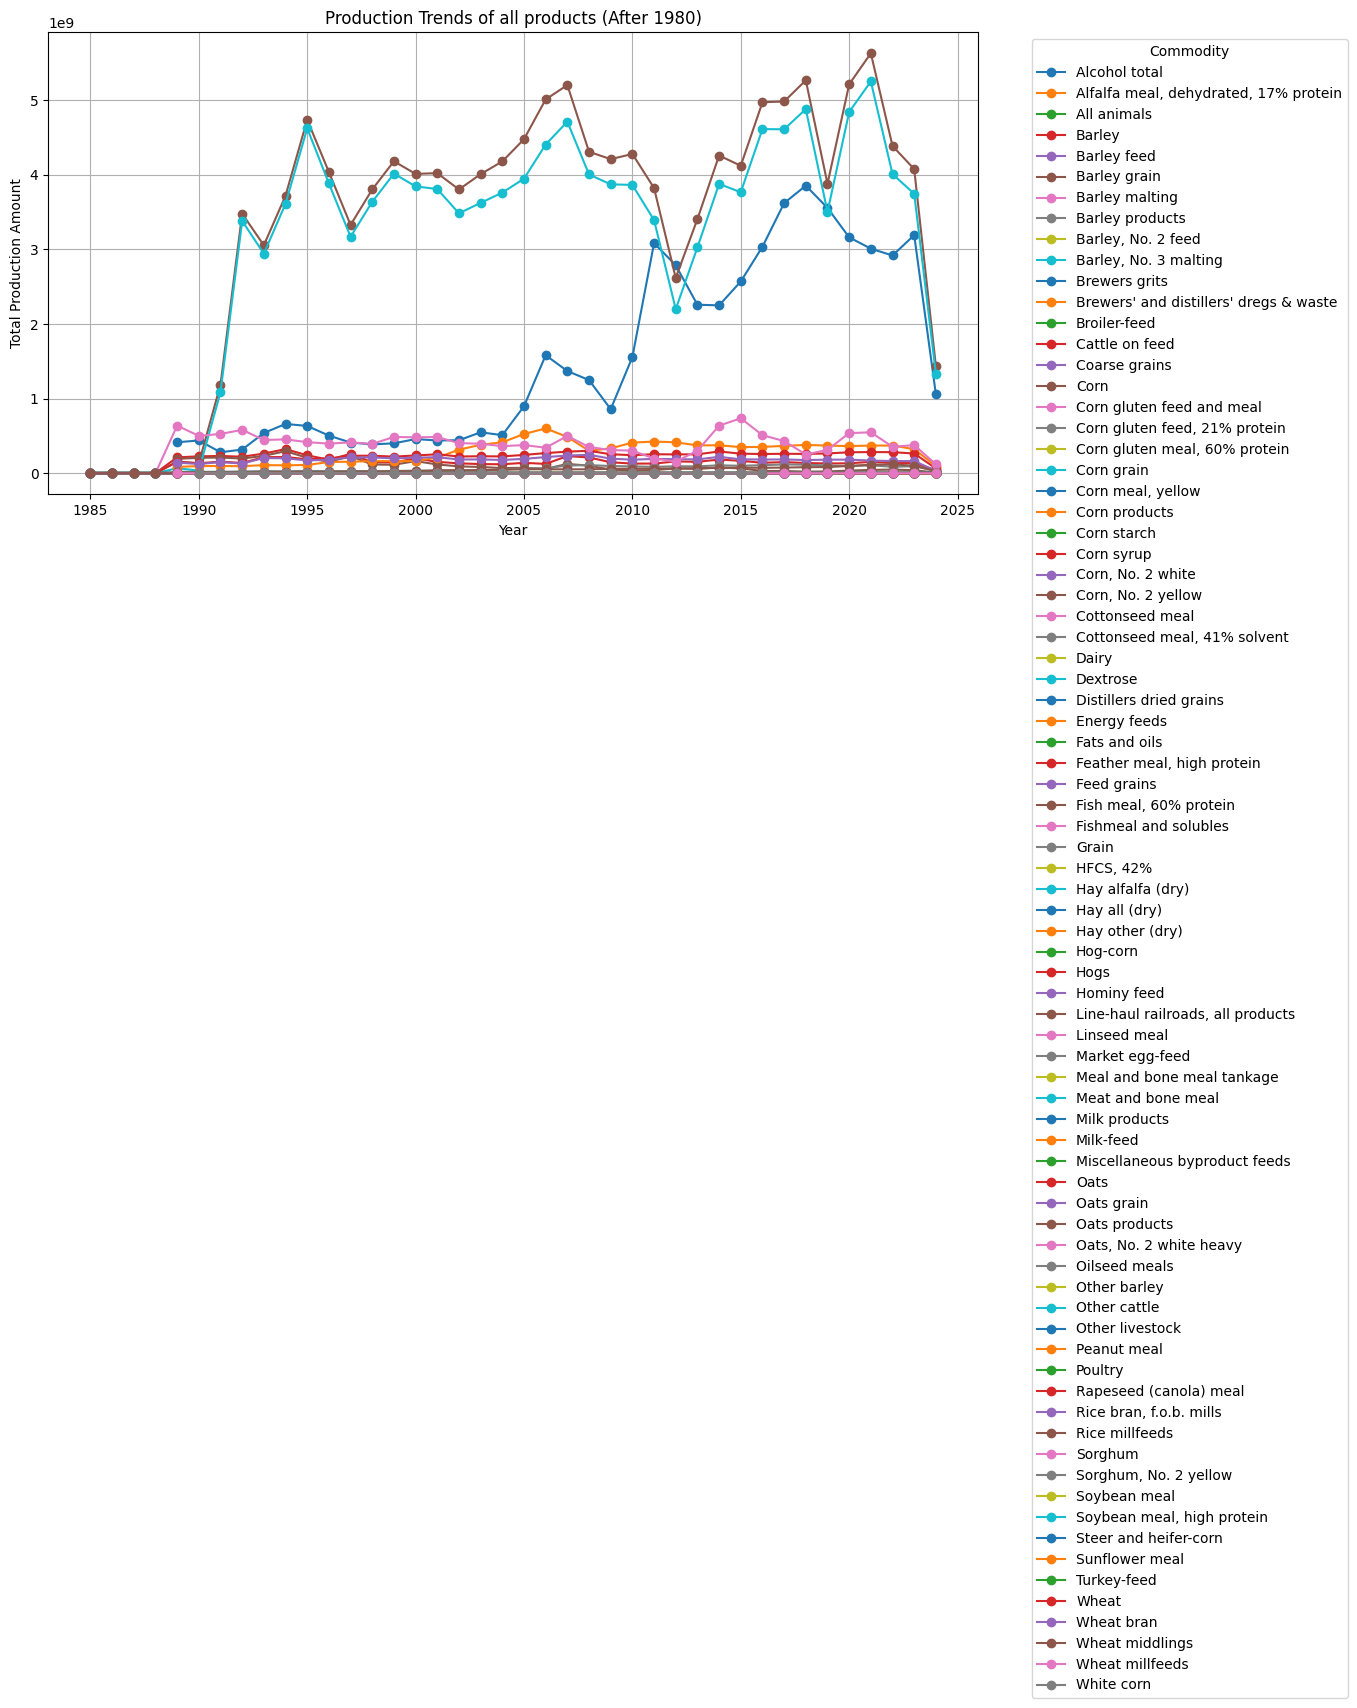

In [9]:
# Filter data for years after 1980
commodity_trends_filtered = data[data['Year_ID'] > 1984].groupby(['Year_ID', 'SC_Commodity_Desc'])['Amount'].sum().unstack()

# Plotting the trend for app products over the years (after 1980)
plt.figure(figsize=(12, 6))
commodity_trends_filtered.plot(ax=plt.gca(), marker='o')
plt.title('Production Trends of all products (After 1980)')
plt.xlabel('Year')
plt.ylabel('Total Production Amount')
plt.grid(True)

# Move the legend outside the plot
plt.legend(title='Commodity', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


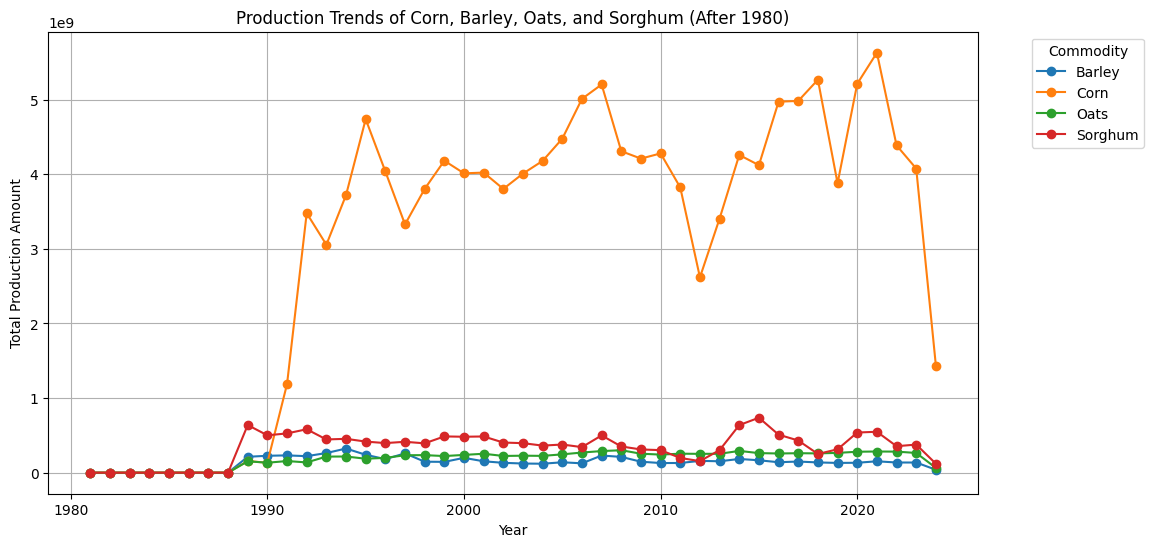

In [10]:
# Filter data for the top commodities and years after 1980
top_commodities = data[(data['SC_Commodity_Desc'].isin(['Corn', 'Barley', 'Oats', 'Sorghum'])) &
                       (data['Year_ID'] > 1980)]

# Group the data by year and commodity, and calculate the total production amount per year for each commodity
commodity_trends = top_commodities.groupby(['Year_ID', 'SC_Commodity_Desc'])['Amount'].sum().unstack()

# Plotting the trend for Corn, Barley, Oats, and Sorghum over the years (after 1980)
plt.figure(figsize=(12, 6))
commodity_trends.plot(ax=plt.gca(), marker='o')
plt.title('Production Trends of Corn, Barley, Oats, and Sorghum (After 1980)')
plt.xlabel('Year')
plt.ylabel('Total Production Amount')
plt.grid(True)

# Move the legend outside the plot
plt.legend(title='Commodity', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


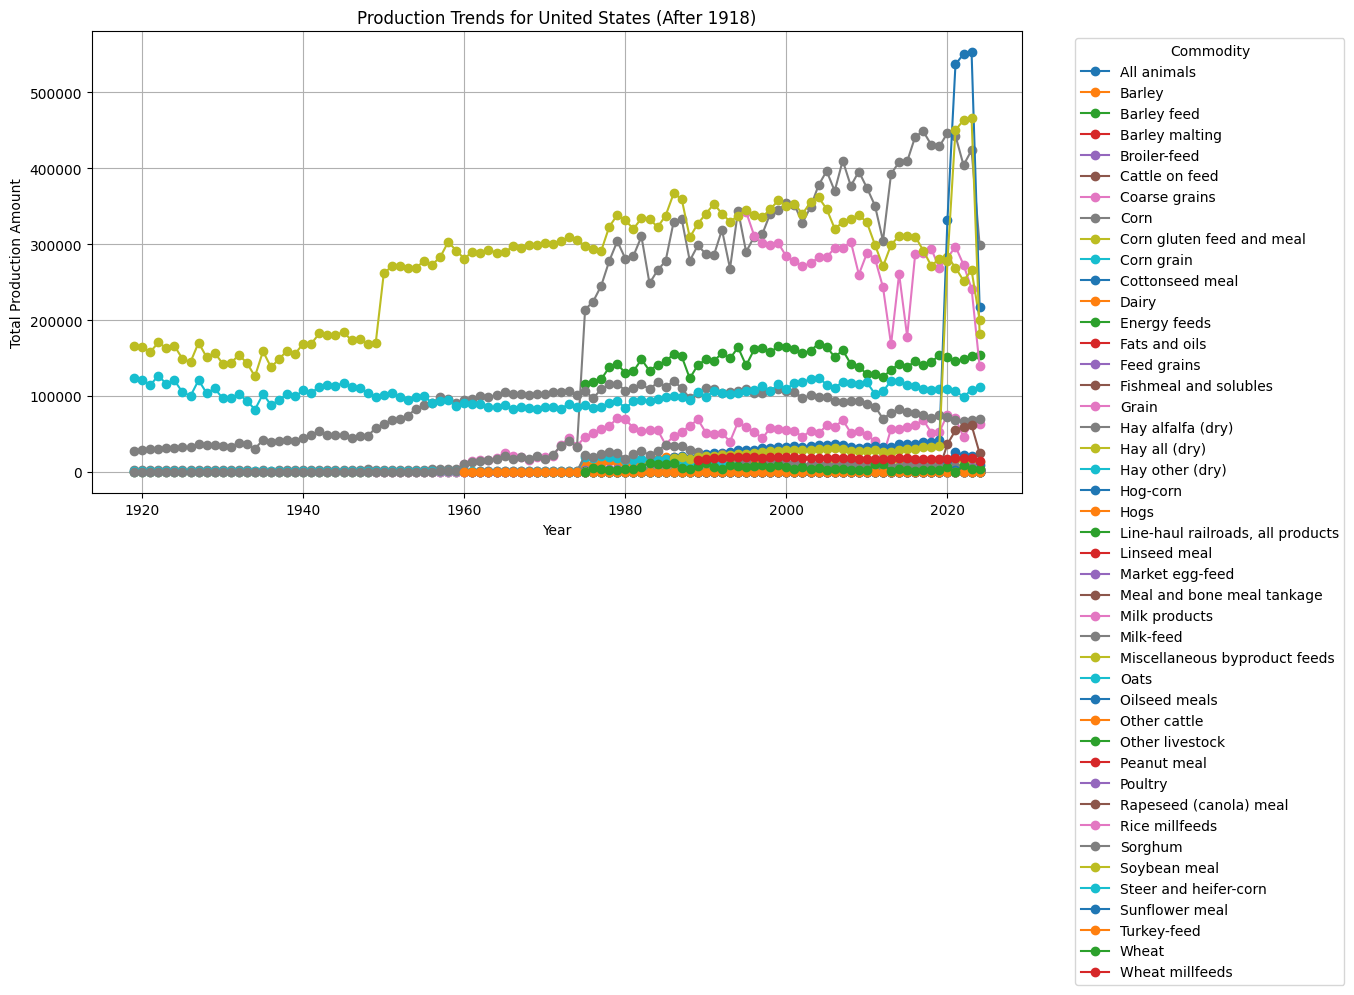

In [11]:
# Filter data for the United States and years after 1918
us_data = data[(data['SC_GeographyIndented_Desc'] == 'United States') & (data['Year_ID'] > 1918)]

# Group by year and commodity, summing the production amount for each commodity per year
us_trends = us_data.groupby(['Year_ID', 'SC_Commodity_Desc'])['Amount'].sum().unstack()

# Plotting the production trend for United States over the years
plt.figure(figsize=(12, 6))
us_trends.plot(ax=plt.gca(), marker='o')
plt.title('Production Trends for United States (After 1918)')
plt.xlabel('Year')
plt.ylabel('Total Production Amount')
plt.grid(True)

# Move the legend outside the plot
plt.legend(title='Commodity', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


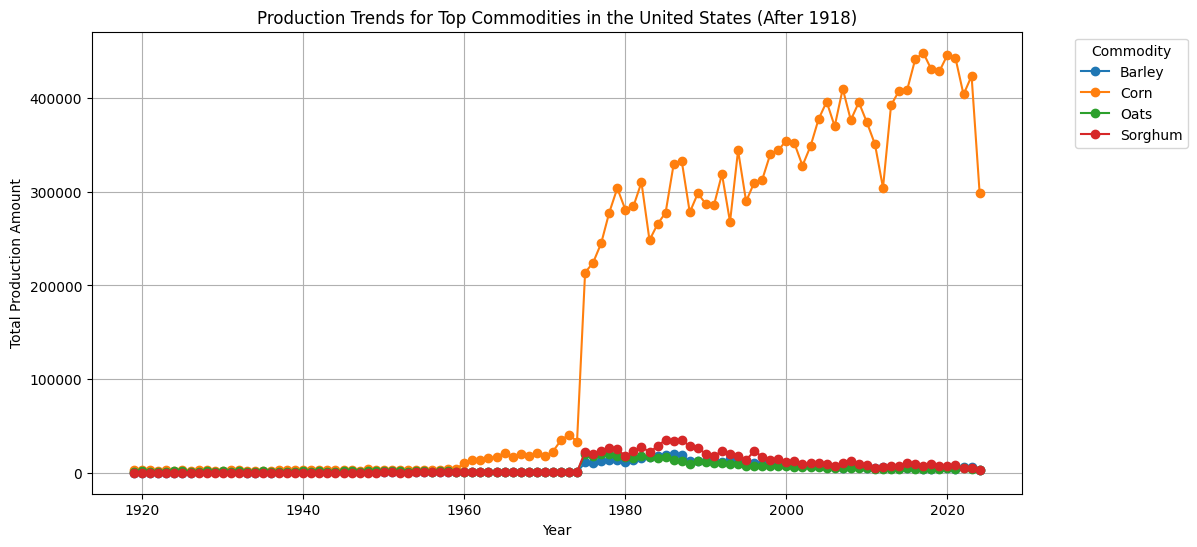

In [12]:
# Filter data for the United States, years after 1918, and the top commodities
top_commodities = ['Corn', 'Barley', 'Oats', 'Sorghum']


us_data = data[(data['SC_GeographyIndented_Desc'] == 'United States') &
               (data['Year_ID'] > 1918) &
               (data['SC_Commodity_Desc'].isin(top_commodities))]

# Group by year and commodity, summing the production amount for each commodity per year
us_trends = us_data.groupby(['Year_ID', 'SC_Commodity_Desc'])['Amount'].sum().unstack()

# Plotting the production trend for the United States (only for top commodities) over the years
plt.figure(figsize=(12, 6))
us_trends.plot(ax=plt.gca(), marker='o')
plt.title('Production Trends for Top Commodities in the United States (After 1918)')
plt.xlabel('Year')
plt.ylabel('Total Production Amount')
plt.grid(True)

# Move the legend outside the plot
plt.legend(title='Commodity', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

2. What is the trend in acreage for the crops over the years?

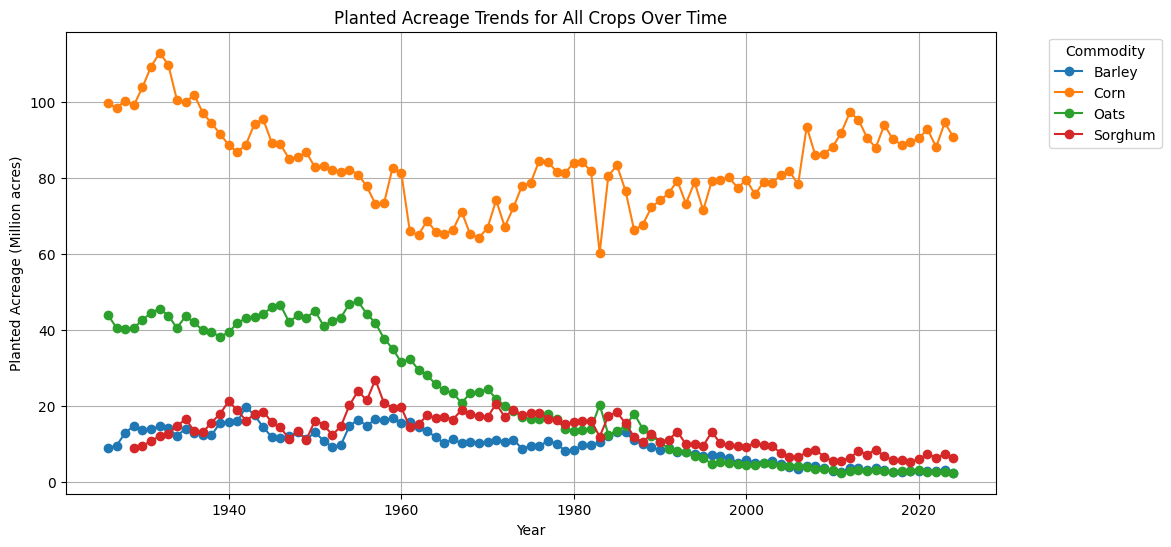

In [13]:
# Filter data for attributes related to planted acreage for all crops
acreage_data = data[data['SC_Attribute_Desc'] == 'Planted acreage']

# Group by year and commodity, summing the planted acreage for each commodity per year
acreage_trends = acreage_data.groupby(['Year_ID', 'SC_Commodity_Desc'])['Amount'].sum().unstack()

# Plotting the planted acreage trend for all crops over the years
plt.figure(figsize=(12, 6))
acreage_trends.plot(ax=plt.gca(), marker='o')
plt.title('Planted Acreage Trends for All Crops Over Time')
plt.xlabel('Year')
plt.ylabel('Planted Acreage (Million acres)')
plt.grid(True)

# Move the legend outside the plot
plt.legend(title='Commodity', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


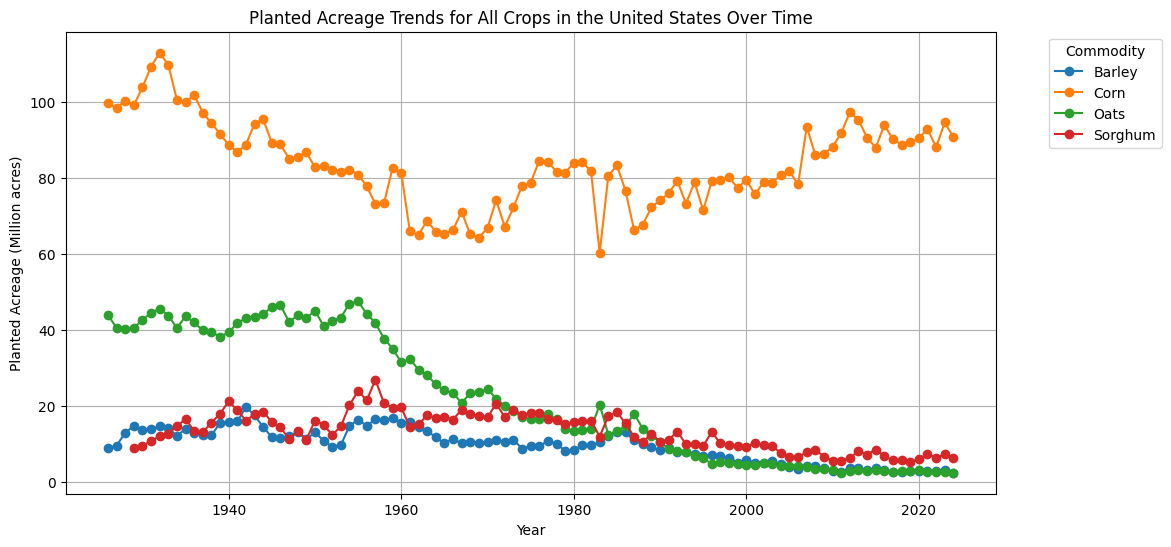

In [14]:
# Filter data for attributes related to planted acreage for all crops in the United States
us_acreage_data = data[(data['SC_Attribute_Desc'] == 'Planted acreage') &
                       (data['SC_GeographyIndented_Desc'] == 'United States')]

# Group by year and commodity, summing the planted acreage for each commodity per year
us_acreage_trends = us_acreage_data.groupby(['Year_ID', 'SC_Commodity_Desc'])['Amount'].sum().unstack()

# Plotting the planted acreage trend for all crops in the United States over the years
plt.figure(figsize=(12, 6))
us_acreage_trends.plot(ax=plt.gca(), marker='o')
plt.title('Planted Acreage Trends for All Crops in the United States Over Time')
plt.xlabel('Year')
plt.ylabel('Planted Acreage (Million acres)')
plt.grid(True)

# Move the legend outside the plot
plt.legend(title='Commodity', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


3. Are there any relationships between different commodities in terms of production amounts?

In [15]:
# Calculate the correlation between production amounts of Corn, Barley, and Oats over the years
commodity_correlation = commodity_trends.corr()

# Display the correlation matrix
commodity_correlation


SC_Commodity_Desc,Barley,Corn,Oats,Sorghum
SC_Commodity_Desc,,,,
Barley,1.000000,0.554473,0.690831,0.806145
Corn,0.554473,1.000000,0.911382,0.629755
Oats,0.690831,0.911382,1.000000,0.729511
Sorghum,0.806145,0.629755,0.729511,1.000000


In [16]:
#value counts for SC_Frequency_Desc
data['SC_Attribute_Desc'].value_counts()

SC_Attribute_Desc
Exports, from U.S. to specified destination          291949
Imports, to U.S. from specified source               158957
Prices received by farmers                            12991
Prices, market                                        12596
Prices, wholesale                                      7037
Price ratio                                            4879
Feed and residual use                                  4664
Ending stocks                                          1487
Food, alcohol, and industrial use                      1487
Beginning stocks                                       1487
Total supply                                           1487
Production                                             1396
Exports, market year                                   1242
Imports, market year                                   1242
Seed use                                               1227
Total disappearance                                    1227
Total domestic use    

4. how does a comparision between export and imports of united states look like?

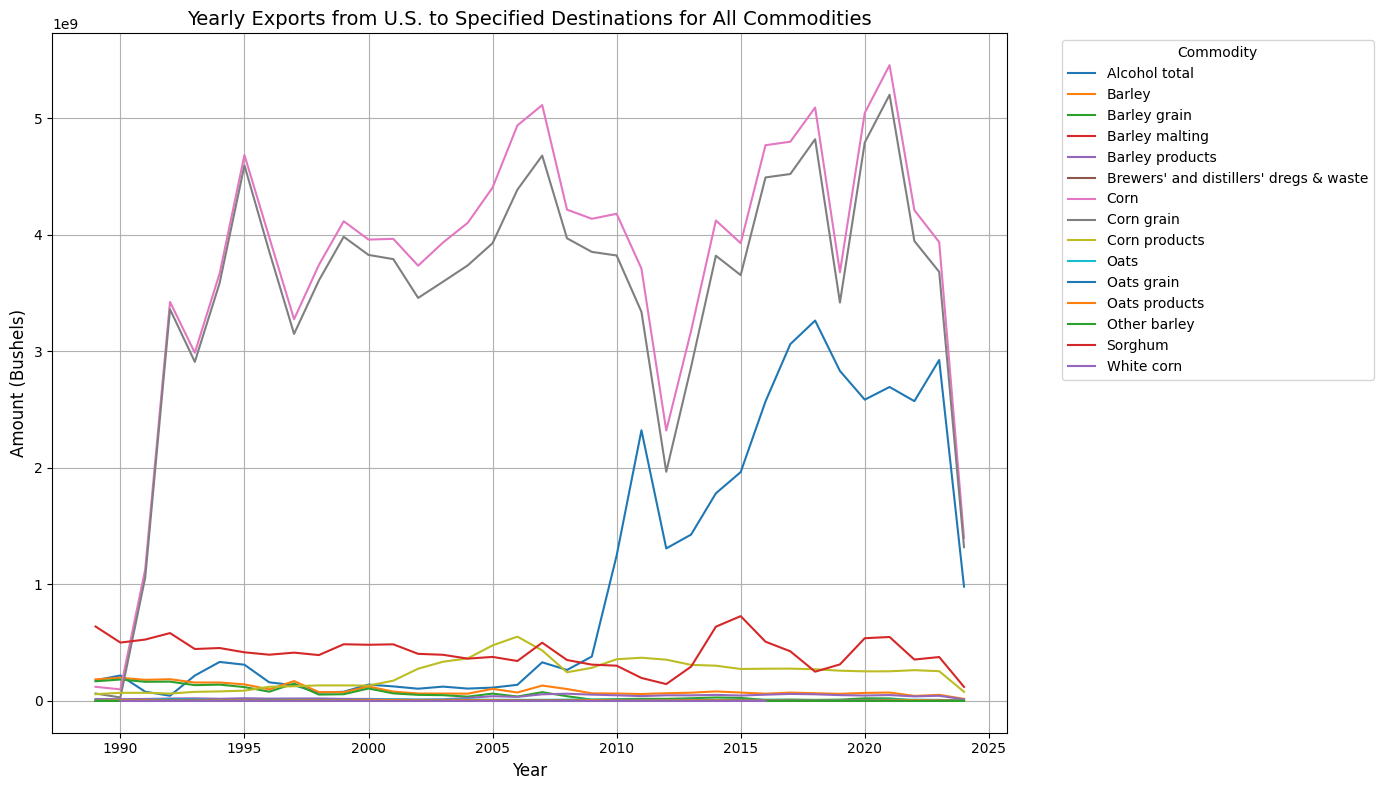

In [17]:
exports_us_to_dest = data[data['SC_Attribute_Desc'] == 'Exports, from U.S. to specified destination']


# Aggregate data by year and commodity for all commodities, summing the export amounts for each year
yearly_all_commodities = exports_us_to_dest.groupby(['Year_ID', 'SC_Commodity_Desc']).agg({'Amount': 'sum'}).reset_index()

# Plot the time series for all commodities using Year_ID as the x-axis
plt.figure(figsize=(14, 8))

# Plot each commodity's export data with different colors for distinction
for commodity in yearly_all_commodities['SC_Commodity_Desc'].unique():
    commodity_data = yearly_all_commodities[yearly_all_commodities['SC_Commodity_Desc'] == commodity]
    plt.plot(commodity_data['Year_ID'], commodity_data['Amount'], label=commodity)

# Adding labels and title
plt.title('Yearly Exports from U.S. to Specified Destinations for All Commodities', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Amount (Bushels)', fontsize=12)
plt.legend(title='Commodity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


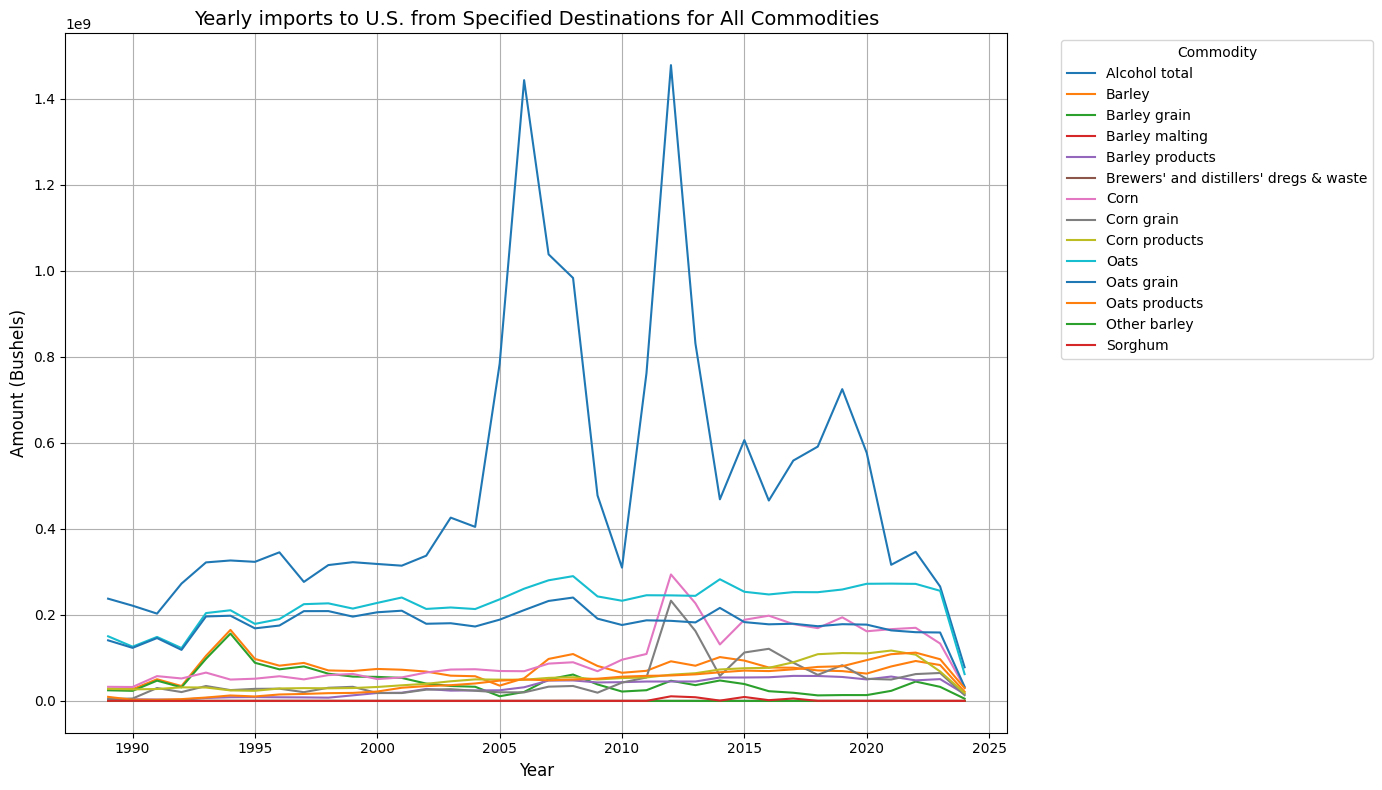

In [18]:
imports = data[data['SC_Attribute_Desc'] == 'Imports, to U.S. from specified source']


# Aggregate data by year and commodity for all commodities, summing the export amounts for each year
yearly_all_commodities = imports.groupby(['Year_ID', 'SC_Commodity_Desc']).agg({'Amount': 'sum'}).reset_index()

# Plot the time series for all commodities using Year_ID as the x-axis
plt.figure(figsize=(14, 8))

# Plot each commodity's export data with different colors for distinction
for commodity in yearly_all_commodities['SC_Commodity_Desc'].unique():
    commodity_data = yearly_all_commodities[yearly_all_commodities['SC_Commodity_Desc'] == commodity]
    plt.plot(commodity_data['Year_ID'], commodity_data['Amount'], label=commodity)

# Adding labels and title
plt.title('Yearly imports to U.S. from Specified Destinations for All Commodities', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Amount (Bushels)', fontsize=12)
plt.legend(title='Commodity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


16385    1866
16386    1867
16387    1868
16388    1869
16389    1870
         ... 
18789    2020
18790    2021
18791    2022
18792    2023
18793    2024
Name: Year_ID, Length: 159, dtype: int64


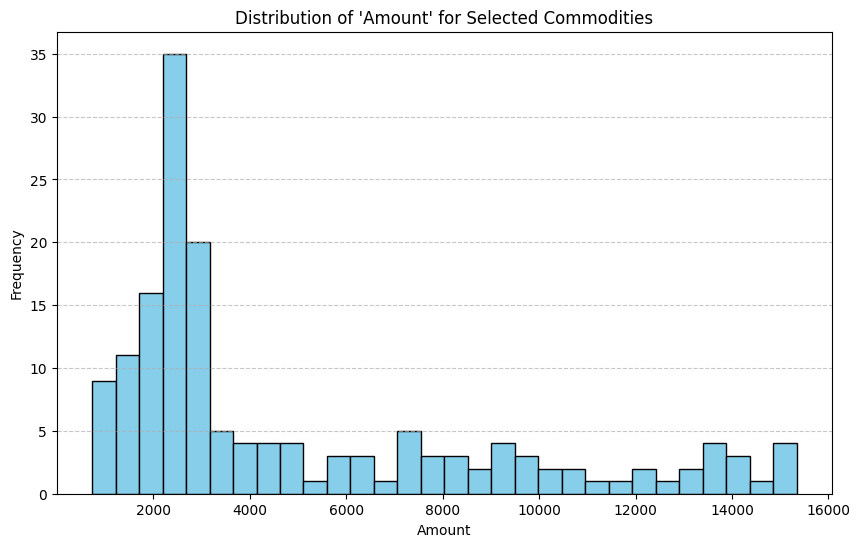

In [19]:
# Filter the dataset for 'Corn', 'Production', and 'Commodity Market Year'
filtered_corn_data = data[
    (data['SC_Commodity_Desc'] == 'Corn') &
    (data['SC_Attribute_Desc'] == 'Production') &
    (data['Timeperiod_Desc'] == 'Commodity Market Year')
]

# Display the first few rows of the filtered data to ensure it matches the user's request
print(filtered_corn_data["Year_ID"])

plt.figure(figsize=(10, 6))
plt.hist(filtered_corn_data["Amount"], bins=30, color="skyblue", edgecolor="black")
plt.title("Distribution of 'Amount' for Selected Commodities")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


In [20]:
# square tranformation for the 'Amount' column
filtered_corn_data['Amount'] = filtered_corn_data['Amount'] ** 1/2

C:\Users\kjs\AppData\Local\Temp\ipykernel_297448\2530555698.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_corn_data['Amount'] = filtered_corn_data['Amount'] ** 1/2


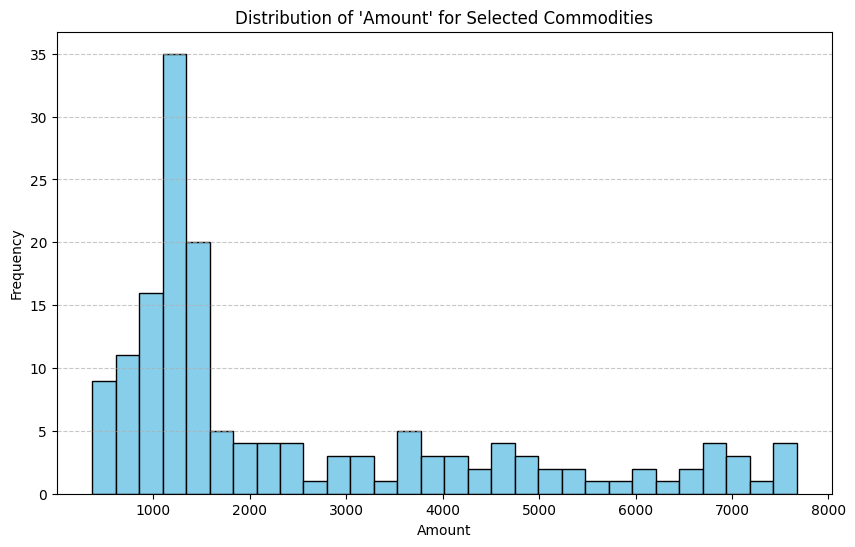

In [21]:
plt.figure(figsize=(10, 6))
plt.hist(filtered_corn_data["Amount"], bins=30, color="skyblue", edgecolor="black")
plt.title("Distribution of 'Amount' for Selected Commodities")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [22]:
filtered_corn_data.tail()

,SC_Group_ID,SC_Group_Desc,SC_GroupCommod_ID,SC_GroupCommod_Desc,SC_Geography_ID,SortOrder,SC_GeographyIndented_Desc,SC_Commodity_ID,SC_Commodity_Desc,SC_Attribute_ID,SC_Attribute_Desc,SC_Unit_ID,SC_Unit_Desc,Year_ID,SC_Frequency_ID,SC_Frequency_Desc,Timeperiod_ID,Timeperiod_Desc,Amount
18789,2,Supply and use,12.0,Corn,1,0.8,United States,2,Corn,4,Production,1,Million bushels,2020,3,Annual,69,Commodity Market Year,7043.3495
18790,2,Supply and use,12.0,Corn,1,0.8,United States,2,Corn,4,Production,1,Million bushels,2021,3,Annual,69,Commodity Market Year,7508.8940
18791,2,Supply and use,12.0,Corn,1,0.8,United States,2,Corn,4,Production,1,Million bushels,2022,3,Annual,69,Commodity Market Year,6825.2655
18792,2,Supply and use,12.0,Corn,1,0.8,United States,2,Corn,4,Production,1,Million bushels,2023,3,Annual,69,Commodity Market Year,7670.7975
18793,2,Supply and use,12.0,Corn,1,0.8,United States,2,Corn,4,Production,1,Million bushels,2024,3,Annual,69,Commodity Market Year,7573.2950


C:\Users\kjs\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\kjs\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\kjs\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, foreca

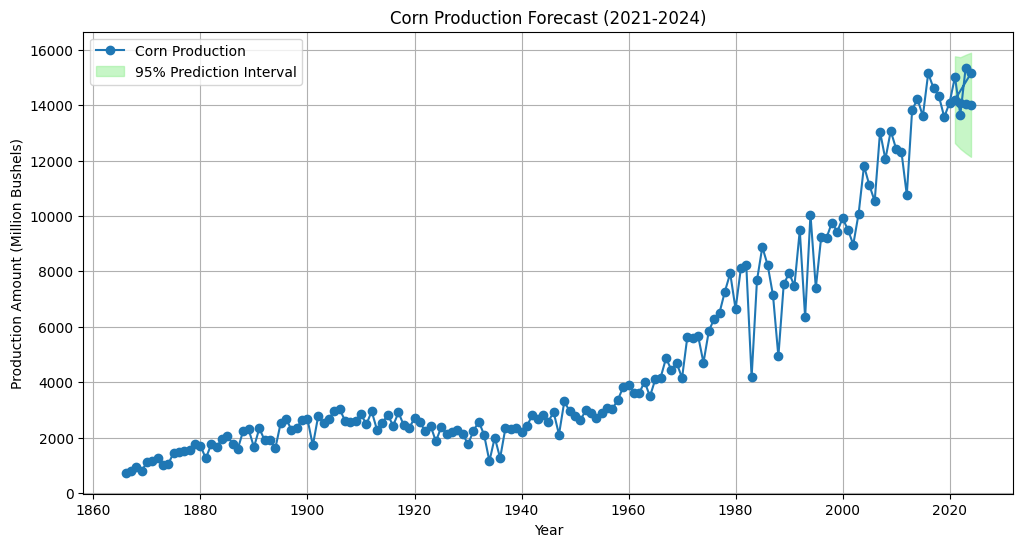

RMSE: 979.1234555927238
MAE: 920.7869014427388
AIC: 2503.3089258975097


In [ ]:
# Import the necessary libraries
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np


# Filter the dataset for 'Corn', 'Production', and 'Commodity Market Year'
filtered_corn_data = data[(data['SC_Commodity_Desc'] == 'Corn') &
                          (data['SC_Attribute_Desc'] == 'Production') &
                          (data['Timeperiod_Desc'] == 'Commodity Market Year')]

# Prepare the data
corn_production = filtered_corn_data[['Year_ID', 'Amount']].set_index('Year_ID')

# Split into training and testing datasets
train_data = corn_production[corn_production.index <= 2020]
test_data = corn_production[corn_production.index > 2020]

# Fit the ARIMA model on training data (p, d, q) - order=(5,1,0)
model = ARIMA(train_data, order=(5,1,0))
model_fit = model.fit()

# Forecast for the testing period (2021-2024)
forecast = model_fit.get_forecast(steps=4)
forecast_values = forecast.predicted_mean
conf_int = forecast.conf_int()

# Create a DataFrame for the forecasted values
forecast_df = pd.DataFrame({'Year_ID': range(2021, 2025), 'Amount': forecast_values})

# Concatenate the original data and the forecasted values for plotting
combined_df = pd.concat([corn_production, forecast_df.set_index('Year_ID')])

# Plot the historical and forecasted corn production
plt.figure(figsize=(12, 6))
plt.plot(combined_df.index, combined_df['Amount'], marker='o', label="Corn Production")
plt.fill_between(forecast_df['Year_ID'], conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='lightgreen', alpha=0.5, label='95% Prediction Interval')
plt.title('Corn Production Forecast (2021-2024)')
plt.xlabel('Year')
plt.ylabel('Production Amount (Million Bushels)')
plt.grid(True)
plt.legend()
plt.show()

# Calculate evaluation metrics (e.g., RMSE and MAE) on the test data
test_data_actual = test_data['Amount']  # The actual values from 2021-2024
rmse = np.sqrt(mean_squared_error(test_data_actual, forecast_values))
mae = mean_absolute_error(test_data_actual, forecast_values)

# Print evaluation metrics
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"AIC: {model_fit.aic}")


C:\Users\kjs\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\kjs\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\kjs\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, foreca

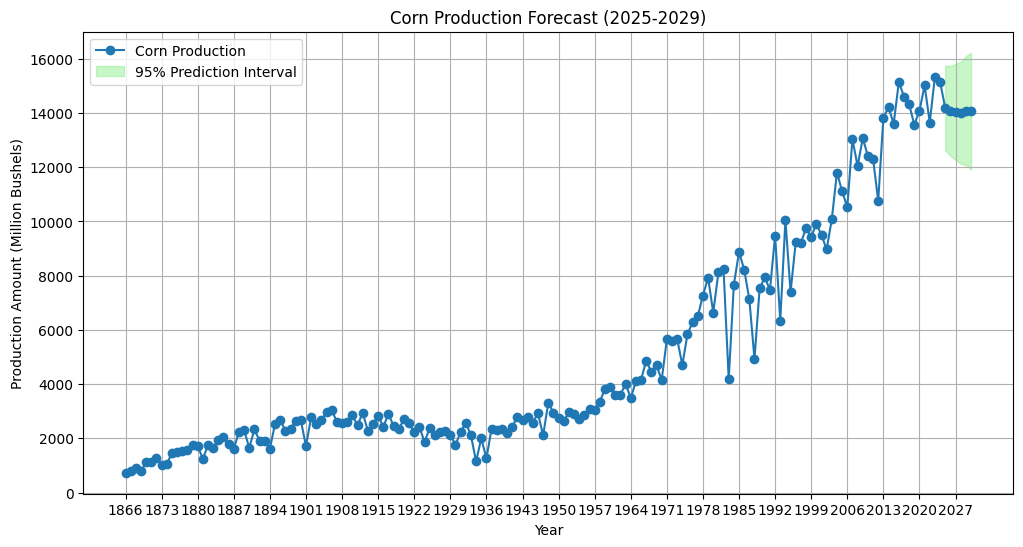

RMSE (2021-2024): 979.1234555927238
MAE (2021-2024): 920.7869014427388
AIC: 2503.3089258975097


C:\Users\kjs\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\kjs\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\kjs\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  retur

In [ ]:
# Import the necessary libraries
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np


# Filter the dataset for 'Corn', 'Production', and 'Commodity Market Year'
filtered_corn_data = data[(data['SC_Commodity_Desc'] == 'Corn') &
                          (data['SC_Attribute_Desc'] == 'Production') &
                          (data['Timeperiod_Desc'] == 'Commodity Market Year')]

# Prepare the data
corn_production = filtered_corn_data[['Year_ID', 'Amount']].set_index('Year_ID')

# Split into training and testing datasets
train_data = corn_production[corn_production.index <= 2020]
test_data = corn_production[(corn_production.index > 2020) & (corn_production.index <= 2024)]

# Fit the ARIMA model on training data (p, d, q) - order=(5,1,0)
model = ARIMA(train_data, order=(5, 1, 0))
model_fit = model.fit()

# Forecast for the future period (2025-2029)
forecast = model_fit.get_forecast(steps=6)  # Steps updated for 2025–2029
forecast_values = forecast.predicted_mean
conf_int = forecast.conf_int()

# Create a DataFrame for the forecasted values (2025-2029)
forecast_df = pd.DataFrame({'Year_ID': range(2025, 2031), 'Amount': forecast_values})

# Concatenate the original data and the forecasted values for plotting
combined_df = pd.concat([corn_production, forecast_df.set_index('Year_ID')])

plt.figure(figsize=(12, 6))
plt.plot(combined_df.index, combined_df['Amount'], marker='o', label="Corn Production")
plt.fill_between(forecast_df['Year_ID'], conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='lightgreen', alpha=0.5, label='95% Prediction Interval')
plt.title('Corn Production Forecast (2025-2029)')
plt.xlabel('Year')
plt.ylabel('Production Amount (Million Bushels)')
plt.grid(True)
plt.legend()

# Set major tick locations for every 10 years
plt.xticks(range(combined_df.index.min(), combined_df.index.max() + 1, 7))  # Adjust range if needed

plt.show()

# Calculate evaluation metrics (e.g., RMSE and MAE) for the test period (2021-2024)
if not test_data.empty:
    test_data_actual = test_data['Amount']  # The actual values from 2021 to 2024
    rmse = np.sqrt(mean_squared_error(test_data_actual, model_fit.get_forecast(steps=4).predicted_mean))
    mae = mean_absolute_error(test_data_actual, model_fit.get_forecast(steps=4).predicted_mean)

    # Print evaluation metrics
    print(f"RMSE (2021-2024): {rmse}")
    print(f"MAE (2021-2024): {mae}")

# Print model information
print(f"AIC: {model_fit.aic}")


C:\Users\kjs\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\kjs\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\kjs\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, foreca

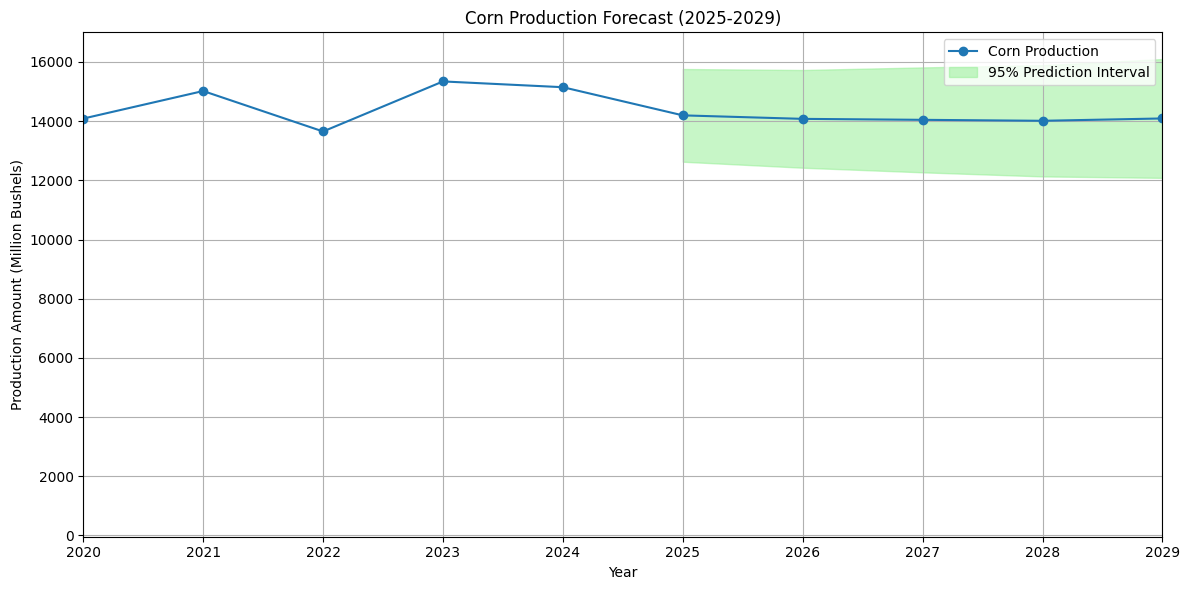

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np


# Filter the dataset for 'Corn', 'Production', and 'Commodity Market Year'
filtered_corn_data = data[(data['SC_Commodity_Desc'] == 'Corn') &
                         (data['SC_Attribute_Desc'] == 'Production') &
                         (data['Timeperiod_Desc'] == 'Commodity Market Year')]

# Prepare the data
corn_production = filtered_corn_data[['Year_ID', 'Amount']].set_index('Year_ID')

# Split into training and testing datasets
train_data = corn_production[corn_production.index <= 2020]
test_data = corn_production[(corn_production.index > 2020) & (corn_production.index <= 2024)]

# Fit the ARIMA model on training data (p, d, q) - order=(5,1,0)
model = ARIMA(train_data, order=(5, 1, 0))
model_fit = model.fit()

# Forecast for the future period (2025-2029)
forecast = model_fit.get_forecast(steps=6)
forecast_values = forecast.predicted_mean
conf_int = forecast.conf_int()

# Create a DataFrame for the forecasted values (2025-2029)
forecast_df = pd.DataFrame({'Year_ID': range(2025, 2031), 'Amount': forecast_values})

# Concatenate the original data and the forecasted values for plotting
combined_df = pd.concat([corn_production, forecast_df.set_index('Year_ID')])

# Plot the historical and forecasted corn production
plt.figure(figsize=(12, 6))
plt.plot(combined_df.index, combined_df['Amount'], marker='o', label="Corn Production")
plt.fill_between(forecast_df['Year_ID'], conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='lightgreen', alpha=0.5, label='95% Prediction Interval')
plt.title('Corn Production Forecast (2025-2029)')
plt.xlabel('Year')
plt.ylabel('Production Amount (Million Bushels)')
plt.grid(True)
plt.legend()

# Set x-axis limits to span 10 years
plt.xlim(2020, 2029)

# Adjust x-axis ticks to show all years
plt.xticks(np.arange(2020, 2030, 1))

plt.tight_layout()
plt.show()